In [1]:
from google.colab import files
import io
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split



import library

In [3]:
#uploaded = files.upload()
# dataset = pd.read_csv('https://raw.githubusercontent.com/syamsulrizal123/SLO/main/data_cancer.csv')
dataset = pd.read_csv('/content/drive/MyDrive/ismad jembut cyber/kddcup.data_10_percent_corrected')
dataset.head(5)


,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,0.5,1,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,8,8.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,9,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


mengupload dataset

In [4]:
dataset.shape

(494020, 42)

In [5]:
dataset.isnull().sum()

0          0
tcp        0
http       0
SF         0
181        0
5450       0
0.1        0
0.2        0
0.3        0
0.4        0
0.5        0
1          0
0.6        0
0.7        0
0.8        0
0.9        0
0.10       0
0.11       0
0.12       0
0.13       0
0.14       0
0.15       0
8          0
8.1        0
0.00       0
0.00.1     0
0.00.2     0
0.00.3     0
1.00       0
0.00.4     0
0.00.5     0
9          0
9.1        0
1.00.1     0
0.00.6     0
0.11.1     0
0.00.7     0
0.00.8     0
0.00.9     0
0.00.10    0
0.00.11    0
normal.    0
dtype: int64

In [ ]:
dataset = dataset.drop(columns=['Unnamed: 32'])

In [7]:
x = dataset.iloc[:, 4:40].values
y = dataset.iloc[:, 41].values


In [8]:
print(y)

['normal.' 'normal.' 'normal.' ... 'normal.' 'normal.' 'normal.']


In [ ]:
print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=600)
hasil =mlp.fit(X_train,y_train)

dataset :  (569, 32)
x :  (569, 29)
y :  (569,)


In [ ]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('accuracy is ',accuracy_score(predictions,y_test))

[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

accuracy is  0.9736842105263158


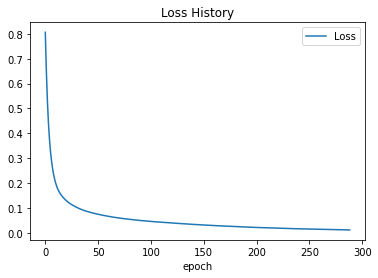

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hasil.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

membagi dataset menjadi dependent dan independent data

# LDA data banyak


In [9]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
x_rlda = lda.fit(x,y).transform(x)
rldaDf = pd.DataFrame(data = x_rlda)
rldaDf.head()

,0,1
0,-13.066150,-2.203768
1,-13.096056,-2.213624
2,-13.150888,-2.226710
3,-13.147518,-2.231648
4,-13.111074,-2.231688


In [11]:
pd_y = pd.DataFrame(y, columns = ['target'])
pd_y.head()


,target
0,normal.
1,normal.
2,normal.
3,normal.
4,normal.


In [12]:
finalDf = pd.concat([rldaDf, pd_y[['target']]], axis = 1)
finalDf.head()

,0,1,target
0,-13.066150,-2.203768,normal.
1,-13.096056,-2.213624,normal.
2,-13.150888,-2.226710,normal.
3,-13.147518,-2.231648,normal.
4,-13.111074,-2.231688,normal.


Text(0.5, 1.0, 'plt lda')

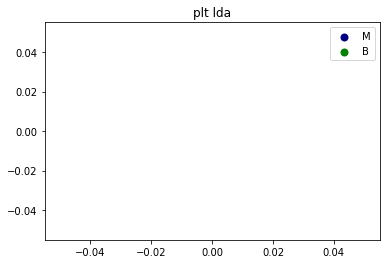

In [13]:
import matplotlib.pyplot as plt

plt.figure()
colors = ['navy','green','red']
targets = ['M', 'B']
lw=2
for color,i,target_name in zip(colors,['M','B'],targets):
  plt.scatter(x_rlda[y==i,0],x_rlda[y==i,0],color=color,lw=lw,label=target_name)
plt.legend(loc='best',shadow=False,scatterpoints=1)
plt.title('plt lda')

In [ ]:
X2=dataset[['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst']]
Y2=dataset[['diagnosis']]

In [ ]:
X2 = StandardScaler().fit_transform(X2)

In [ ]:
X2.shape

(569, 5)

In [ ]:
lda2 = LinearDiscriminantAnalysis(n_components=2)
x_rlda2 = lda2.fit(X2,Y2).transform(X2)
rldaDf2 = pd.DataFrame(data = x_rlda2)
rldaDf2.head()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(5, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


,0
0,4.612970
1,1.920728
2,2.524220
3,1.256970
4,1.795790


In [ ]:
finalDf2 = pd.concat([rldaDf2, dataset[['diagnosis']]], axis = 1)
finalDf2.head()

,0,diagnosis
0,4.612970,M
1,1.920728,M
2,2.524220,M
3,1.256970,M
4,1.795790,M


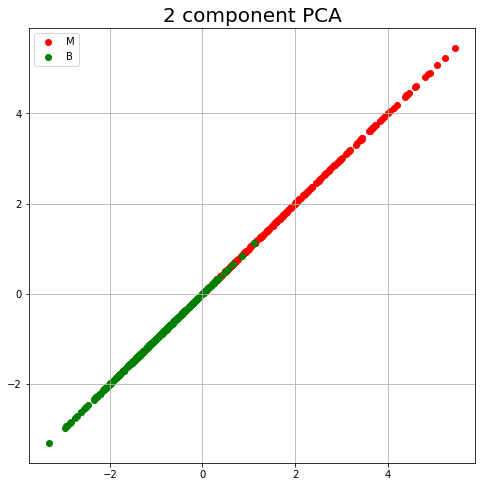

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['diagnosis'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 0]
               , finalDf2.loc[indicesToKeep, 0]
               , c = color)
ax.legend(targets)
ax.grid()

# mlp dengan fa data banyak


In [ ]:
dataset_clas1 = finalDf
y_clas1 = dataset_clas1['target']
x_clas1 = dataset_clas1.drop(['target'], axis=1)

print ("dataset : ",dataset_clas1.shape)
print ("x : ",x_clas1.shape)
print ("y : ",y_clas1.shape)

dataset :  (569, 2)
x :  (569, 1)
y :  (569,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_clas1, y_clas1, test_size = 0.2, random_state = 42)

membagi data train dan data test

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=600)
hasil =mlp.fit(X_train,y_train)

# Hasil Accuracy LDA data banyak

In [ ]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('accuracy is ',accuracy_score(predictions,y_test))

[[70  1]
 [ 1 42]]
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        71
           M       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

accuracy is  0.9824561403508771


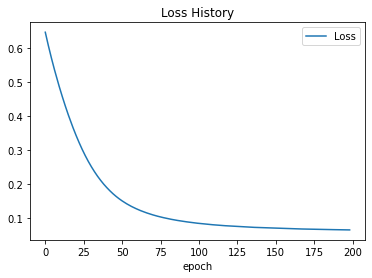

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hasil.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

# MLP lDA Data sedikit

In [ ]:
dataset_clas1 = finalDf2
y_clas1 = dataset_clas1['diagnosis']
x_clas1 = dataset_clas1.drop(['diagnosis'], axis=1)

print ("dataset : ",dataset_clas1.shape)
print ("x : ",x_clas1.shape)
print ("y : ",y_clas1.shape)

dataset :  (569, 2)
x :  (569, 1)
y :  (569,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_clas1, y_clas1, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=600)
hasil =mlp.fit(X_train,y_train)

In [ ]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('accuracy is ',accuracy_score(predictions,y_test))

[[69  2]
 [ 2 41]]
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        71
           M       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

accuracy is  0.9649122807017544


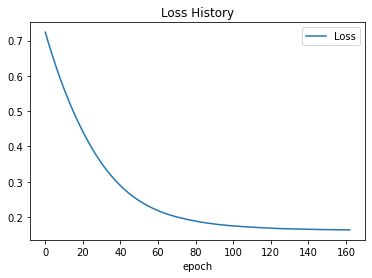

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hasil.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])